# MSDS 7331 Project 1
### Lab One: Visualization and Data Preprocessing 

#### James (Jim) Brittain and Joseph Cook

### FAA WILDLIFE (BIRD) STRIKE DATA 1990-2015

## Business Understanding
This data appears to be the data behind the searchable database for Airplane strikes of wildlife found at: 
https://wildlife.faa.gov/.

The dataset was found on Kaggle: Aircraft Wildlife Strikes 1990-2015 https://www.kaggle.com/faa/wildlife-strikes
The dataset provides various data related to each wildlife strike by an airplane for the years 1990-2015. There is very detailed information on the species of animal being struck, the make and model of the aircraft, and indicators of strike location on the aircraft and damage indicators. When searching the internet for more information on this dataset such as data labels/values for categorical numeric values that must represnent more detailed values; we found that the FAA publishes a detailed report using this data in conjuction with additional data in some cases. The latest version of this report can be found here: https://www.faa.gov/airports/airport_safety/wildlife/media/Wildlife-Strike-Report-1990-2015.pdf

The main purpose of this data is to track incidents of wildlife strikes by airplanes with the intention of trying to make changes that may lower the incidence rate. Some of the methods used to reduce birds in the vacinity of airports, to lower the bird strike rate; include: using preditor birds to scare away other species, air cannons (for sound), and not allowing land fills within close proximity of airports.   

Although there are a large number of bird strikes in this data from 1990-2015 n=168,149; these incidents rarely result in injury (incidents n=204 resulting in n=265 injuries) or death  (incidents n=11 resulting in n=25 deaths). A search for total flights in the US per year found this report: http://garfors.com/2014/06/100000-flights-day.html/. The report shows that "there are 37.4 million flights scheduled in 2014" compared to 13,455 bird strikes in that same year.


## Describe the meaning and type of data 
Reviewing the Kaggle page that presents this data and even searching the FAA site did not turn up a data dictionary which makes some of the variables less useful for data analysis. Another interesting point was that the FAA website does not appear to have this data available there.  

This data includes bird strikes, terestrial animal strikes, and bats. For the purpose of this analysis the dataset will be subset to just the bird strikes which represents the largest portion of the incidents.

Some variables have been dropped due to not being needed for the chosen analysis.

Initial analysis was done in SAS and used to create the Data Dictionary. (Necessary data cleaning and frequencies were reproduced in this notebook)

### Data Dictionary
#####        VARIABLE                    DATA TYPE
    Incident_Year             INT           Year of Bird/Aircraft Strike
                                            (1990 - 2015)
    Incident_Month            INT           Month of Bird/Aircraft Strike
                                            (1 - 12)
    Operator_ID               CAT           Aircraft Company/Affiliation Code
    Operator                 String         Aircraft Company/Affiliation Description/Name
    Aircraft                  CAT           ID Code for Aircraft
    Aircraft_Type             CAT           Believed to be Commercial/Private? 
                                            (A, B / 23% Missing - Includes value=J n=5)
    Aircraft_Mass             INT           5 categories (seached for values but only found a report with 4 categories)
                                            (1 - 5 / 26% Missing)
    Engines                   INT           Number of engines on the aircraft
                                            (1 - 4 / 26% Missing)
    Engine_Type               CAT           Type of Engine on Aircraft
                                            (A-Reciprocating, B-Turbojet, C-Turboprop, D-Turbofan,
                                             E-None (glider), F-Turboshaft (helicopter),
                                             Y-Other
                                              / 26% Missing)
    Airport_ID                CAT           Airport Code
    Airport                  String         Airport Description/Name
    State                     CAT           State of Strike
    FAA_Region                CAT           FAA Region of Strike
    Warning_Issued            CAT           Was a Warning Issued?
                                            (y/Y, n/N / 55% Missing)
    Flight_Phase              CAT           State of Filght when Strike Occured
                                            (APPROACH, ARRIVAL, CLIMB, DEPARTURE, DESCENT, EN ROUTE, LANDING, LANDING ROLL,
                                             LOCAL, PARKED, TAKEOFF RUN, TAXI / 31% Missing)
    Height                 CONTINUOUS       Height Above Ground
                                            (0 - 31,300 / 40% Missing)
    Speed                  CONTINUOUS       Airspeed (nautical miles/hour [knots])
                                            (0 - 500 / 58% Missing - Includes 1 outlier of 2500)
    Species_ID                CAT           Species Struck ID
    Species_Name             String         Species Struck Description/Name
    * species_group           CAT           * Created Var * Species Grouped to 20 Categories
                                            (48% UNKNOWN)
    Species_Quantity          CAT           Number of Species Struck
                                            (1, 2-10, 11-100, Over 100
                                             / 2% Missing)
    Flight_Impact             CAT           Impact of Flight from Strike
                                            (ABORTED TAKEOFF, ENGINE SHUTDOWN, NONE, OTHER, PRECAUTIONARY LANDING 
                                             / 42% Missing) 
    Fatalities                INT           Number of Fatalities Strike Incident
                                            (0 - 8 / 99.7% Missing)
    Injuries                  INT           Number of Fatalities Strike Incident
                                            (1 - 7 / 99.9% Missing)
    Aircraft_Damage           INT BINARY    Indicator of Damage to the Aircraft
                                            (0-No Damage - 1-Damage Sustained)
    Engine_Ingested           INT BINARY
##### INDICATORS for strike and damage (2 variables each)    
    Radome (Strike & Damage)  INT BINARY
    Windshield                INT BINARY
    Nose                      INT BINARY
    Engine[1-4]               INT BINARY
    Propeller                 INT BINARY
    Wing_or_Rotor             INT BINARY
    Fuselage                  INT BINARY
    Landing_Gear              INT BINARY
    Tail                      INT BINARY
    Lights                    INT BINARY
    Other                     INT BINARY

* For all of the Strike / Damage variable pairs there are always a small number of records where there is no strike indicated but Damage is indicated.


## Verify Data Quality
Data INconsistancies 
* Flight_Impact has 2 categories for ENGINE SHUTDOWN and ENGINE SHUT DOWN that need to be combined
     * These values should be converted to match
* Warning_Issued has both lowercase and uppercase values.  
     * Change to all uppercase if the variable is to be used.
* Speed has 1 outlier of 2500. When looked up, it is an incident of a strike of Swallows at 180 Feet by a C-21A Military Aircraft. WHen looked up, the C-21A has a top-speed of 542 MPH. https://www.google.com/search?q=Aircraft+Speed+2500+knots&rlz=1C1WPZB_enUS634US634&oq=Aircraft+Speed+2500+knots&aqs=chrome..69i57.10517j0j8&sourceid=chrome&ie=UTF-8#q=C-21A
     * This record is most likely an error in coding and should be recoded to 250.
* First position of Species_ID is being used to categorize species into a useable set of categories. One record is k instead of K
     * Recode this one record to uppercase before applying recode.
     

In [1]:
import pandas as pd
import numpy as np

#raw = pd.read_csv("C:/users/runni/Documents/MASTERS/Data Mining/wildlife-strikes/database.csv")
# r Masks \ /
raw = pd.read_csv(r"C:/users/runni/Documents/MASTERS/Data Mining/wildlife-strikes/database.csv", header=0, low_memory=False)

#read in file
df = raw
df.columns = [c.replace(' ', '_') for c in raw.columns]

df.head()

,Record_ID,Incident_Year,Incident_Month,Incident_Day,Operator_ID,Operator,Aircraft,Aircraft_Type,Aircraft_Make,Aircraft_Model,...,Fuselage_Strike,Fuselage_Damage,Landing_Gear_Strike,Landing_Gear_Damage,Tail_Strike,Tail_Damage,Lights_Strike,Lights_Damage,Other_Strike,Other_Damage
0,127128,1990,1,1,DAL,DELTA AIR LINES,B-757-200,A,148,26,...,0,0,0,0,1,1,0,0,0,0
1,129779,1990,1,1,HAL,HAWAIIAN AIR,DC-9,A,583,90,...,0,0,0,0,0,0,0,0,1,0
2,129780,1990,1,2,UNK,UNKNOWN,UNKNOWN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
3,2258,1990,1,3,MIL,MILITARY,A-10A,A,345,NaN,...,0,0,0,0,0,0,0,0,0,0
4,2257,1990,1,3,MIL,MILITARY,F-16,A,561,NaN,...,0,0,0,0,0,0,0,0,0,0


In [2]:
print (df.dtypes)
print (df.info())

Record_ID                 int64
Incident_Year             int64
Incident_Month            int64
Incident_Day              int64
Operator_ID              object
Operator                 object
Aircraft                 object
Aircraft_Type            object
Aircraft_Make            object
Aircraft_Model           object
Aircraft_Mass           float64
Engine_Make             float64
Engine_Model             object
Engines                 float64
Engine_Type              object
Engine1_Position         object
Engine2_Position        float64
Engine3_Position         object
Engine4_Position        float64
Airport_ID               object
Airport                  object
State                    object
FAA_Region               object
Warning_Issued           object
Flight_Phase             object
Visibility               object
Precipitation            object
Height                  float64
Speed                   float64
Distance                float64
                         ...   
Aircraft

In [3]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline

## Data Manipulation
* Create "Modified" DF (BS-BIRD STRIKES)
* Dropped several variables deemed not necessary for current analysis
* Fix Value for Flight Impact (2 Categories coded: ENGINE SHUT DOWN & ENGINE SHUTDOWN)
* Identified the first position of the Species ID could be used to group Species (species_group)
* Dropped records for Terestrial Animals and Batts to focus analysis on Birds
* Recoded 1 species from k->K

In [4]:
# DROP VARS
df = df.drop('Record_ID', axis=1)
df = df.drop('Incident_Day', axis=1)
df = df.drop('Aircraft_Make', axis=1)
df = df.drop('Aircraft_Model', axis=1)
df = df.drop('Distance', axis=1)
df = df.drop('Engine_Make', axis=1)
df = df.drop('Engine_Model', axis=1)
df = df.drop('Engine1_Position', axis=1)
df = df.drop('Engine2_Position', axis=1)
df = df.drop('Engine3_Position', axis=1)
df = df.drop('Engine4_Position', axis=1)
df = df.drop('Visibility', axis=1)
df = df.drop('Precipitation', axis=1)

# LIST RESULTING VARS WITH DATA TYPES
print (df.dtypes)

# SIMPLE STATISTICS
print (df.describe())

Incident_Year             int64
Incident_Month            int64
Operator_ID              object
Operator                 object
Aircraft                 object
Aircraft_Type            object
Aircraft_Mass           float64
Engines                 float64
Engine_Type              object
Airport_ID               object
Airport                  object
State                    object
FAA_Region               object
Warning_Issued           object
Flight_Phase             object
Height                  float64
Speed                   float64
Species_ID               object
Species_Name             object
Species_Quantity         object
Flight_Impact            object
Fatalities              float64
Injuries                float64
Aircraft_Damage           int64
Radome_Strike             int64
Radome_Damage             int64
Windshield_Strike         int64
Windshield_Damage         int64
Nose_Strike               int64
Nose_Damage               int64
Engine1_Strike            int64
Engine1_

C:\Users\runni\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


In [5]:
# RECODES
df['Flight_Impact'] = df['Flight_Impact'].replace(to_replace='ENGINE SHUT DOWN', value='ENGINE SHUTDOWN')
df['Speed'] = df['Speed'].replace(to_replace=2500, value=250)

# FREQ. TO CONFIRM
print(df['Flight_Impact'].value_counts(dropna=False))

# SUBSTRING SPECIES CODE
df['species_gp'] = df['Species_ID'].str[:1]
df['species_gp'] = df['species_gp'].replace(to_replace='k', value='K')

# DROP 1 & 2 (NON-BIRDS)
df = df[df['species_gp'].isin(['1','2']) == False]

# FREQ. TO CONFIRM
df['species_gp'].value_counts(dropna=False)

NONE                     88082
NaN                      74639
PRECAUTIONARY LANDING     6145
OTHER                     2423
ABORTED TAKEOFF           2352
ENGINE SHUTDOWN            463
Name: Flight_Impact, dtype: int64


U    80851
Y    18525
N    18219
Z    15651
O    12290
K    11104
J     4941
R     2544
I     1601
T      817
S      616
M      449
H      307
L      278
X      184
F      110
G       82
Q       59
E       42
P       24
W       11
Name: species_gp, dtype: int64

In [6]:
def set_group(row):
    if row["species_gp"] == "E":
        val = "LOONS"
    elif row["species_gp"] == "F":
        val = "GREBES"
    elif row["species_gp"] == "G":
        val = "ALBATROSS, SHEARWATERS"
    elif row["species_gp"] == "H":
        val = "TROPICBIRDS,PELICANS,CORMORANTS"
    elif row["species_gp"] == "I":
        val = "HERONS, EGRETS, BITTE"
    elif row["species_gp"] == "J":
        val = "DUCKS, GEESE, SWANS"
    elif row["species_gp"] == "K":
        val = "HAWKS, EAGLES, FALCONS"
    elif row["species_gp"] == "L":
        val = "GALLINACEOUS BIRDS"
    elif row["species_gp"] == "M":
        val = "CRANES, RAILS, GALLINULES"
    elif row["species_gp"] == "N":
        val = "SHOREBIRD"
    elif row["species_gp"] == "O":
        val = "PIGEONS, DOVES"
    elif row["species_gp"] == "P":
        val = "PARROTS"
    elif row["species_gp"] == "Q":
        val = "CUCKOOS, ROADRUNNERS"
    elif row["species_gp"] == "R":
        val = "OWLS"
    elif row["species_gp"] == "S":
        val = "NIGHTJARS"
    elif row["species_gp"] == "T":
        val = "SWIFTS, HUMMINGBIRDS"
    elif row["species_gp"] == "U":
        val = "UNKNOWN"
    elif row["species_gp"] == "W":
        val = "KINGFISHER"
    elif row["species_gp"] == "X":
        val = "WOODPECKERS, PICULETS"
    elif row["species_gp"] in["Y","Z"]:
        val = "PERCHING BIRDS"
    else:
        val = '---'
    return val

# RUN ABOVE ASSIGNMENT
df['species_group'] = df.apply(set_group, axis=1)

# FREQ. TO CONFIRM
print(df['species_group'].value_counts(dropna=False))

UNKNOWN                            80851
PERCHING BIRDS                     34176
SHOREBIRD                          18219
PIGEONS, DOVES                     12290
HAWKS, EAGLES, FALCONS             11104
DUCKS, GEESE, SWANS                 4941
OWLS                                2544
HERONS, EGRETS, BITTE               1601
SWIFTS, HUMMINGBIRDS                 817
NIGHTJARS                            616
CRANES, RAILS, GALLINULES            449
TROPICBIRDS,PELICANS,CORMORANTS      307
GALLINACEOUS BIRDS                   278
WOODPECKERS, PICULETS                184
GREBES                               110
ALBATROSS, SHEARWATERS                82
CUCKOOS, ROADRUNNERS                  59
LOONS                                 42
PARROTS                               24
KINGFISHER                            11
Name: species_group, dtype: int64


## Visualize Appropriate Statistics  

In [7]:
pd.crosstab(df['Windshield_Strike'],df['Windshield_Damage'])

Windshield_Damage,0,1
Windshield_Strike,,
0,144653,14
1,23036,1002


In [8]:
pd.crosstab(df['Engine1_Strike'],df['Engine1_Damage'])

Engine1_Damage,0,1
Engine1_Strike,,
0,159151,27
1,7172,2355


In [9]:
pd.crosstab(df['Fuselage_Strike'],df['Fuselage_Damage'])

Fuselage_Damage,0,1
Fuselage_Strike,,
0,151017,40
1,17016,632


There are 14 pairs of indicator variables that indicate if a strike occured and if there was damage sustained. For each of these, there is a small percentage of cases where no strike is indicated but damage is indicated.

C:\Users\runni\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


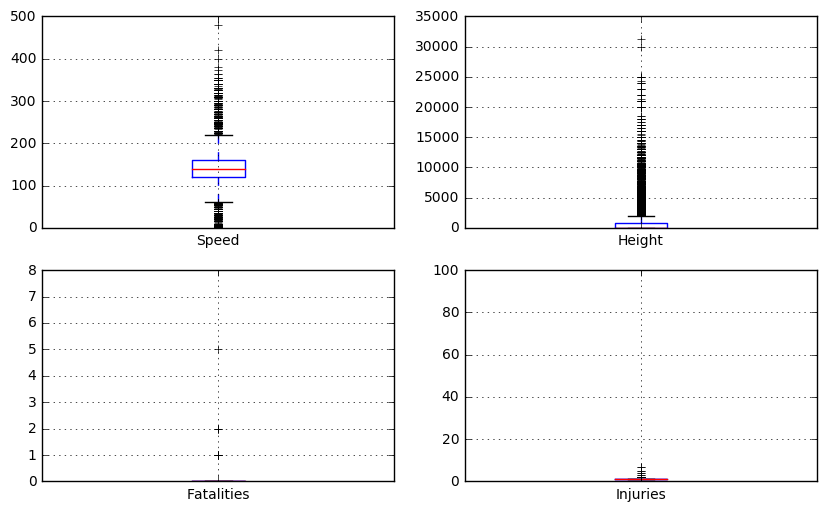

In [34]:
#attributes to plot
atts_to_plot = ['Speed','Height','Fatalities','Injuries']

plt.figure(figsize=(10, 6))

for index, plot_vars in enumerate(atts_to_plot):
    plt.subplot(len(atts_to_plot)/2, 
                2, 
                index+1)
    ax = df.boxplot(column=plot_vars)
    
plt.show()

['1' '2-10' nan '11-100' 'Over 100']
Species_Quantity
1           141651
11-100        1163
2-10         21612
Over 100        46
Name: Aircraft_Damage, dtype: int64


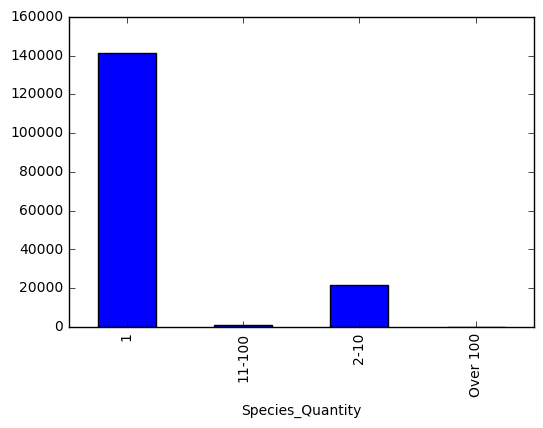

In [45]:
Quantity = pd.unique(df['Species_Quantity'])
print(Quantity)

species_quant = df.groupby(by='Species_Quantity').Aircraft_Damage.count()
print(species_quant)

species_quant.plot(kind='bar')

## Visualize the most interesting attributes

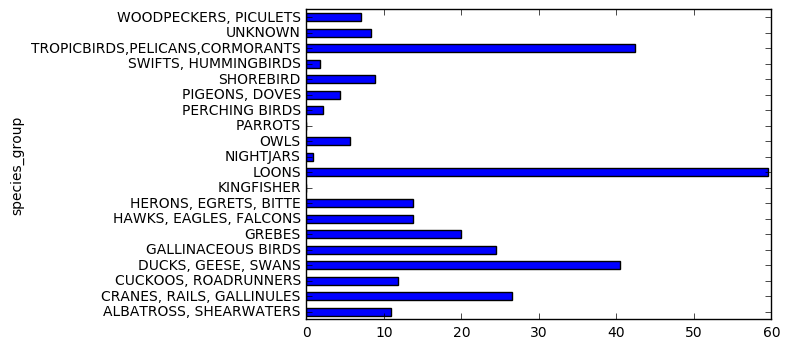

In [10]:
df_grouped = df.groupby(by=['species_group'])
damage_pct = (df_grouped.Aircraft_Damage.sum() / df_grouped.Aircraft_Damage.count()) * 100  

#print(damage_pct)

dmg_plt = damage_pct.plot(kind='barh')

##### Percent of Bird Strikes Resulting in Damage
The above chart shows that aircraft strikes by the "Loons' category have the highest percent of incidents that cause damage with ~60% of strikes resulting in damage of some sort. This is followed by the groups: 'TROPICBIRDS,PELICANS,CORMORANTS' and 'DUCKS, GEESE, SWANS'.

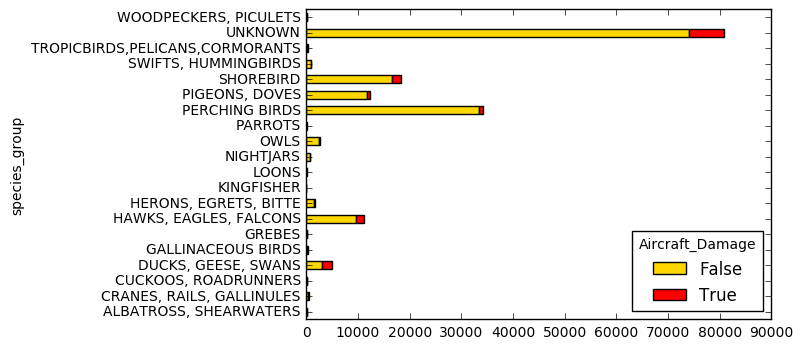

In [11]:
# VERTICAL BAR CHART INCLUDING PCT DAMAGE AND TOTAL INCIDENTS PER SPECIES GROUP
damage_counts = pd.crosstab(df['species_group'],df['Aircraft_Damage'].astype(bool))

damage_counts.plot(kind='barh',
                   stacked=True,
                   color=['gold','red'])

##### Percent of Bird Strikes Resulting in Damage (Including Total Incidents per Species Group)
The above chart shows adds an additiona dimention of total bird strikes. It shows that aircraft strikes by 'Unknown' species lead the total incidents followed by 'PERCHING BIRDS'. This also shows the percent of strikes resulting in damage of some sort as in the previous chart but total number of incidents is what the catches the viewer first.

## Visualize Relationships Between Attributes 

Incident_Year
1990     2041
1991     2611
1992     2738
1993     2776
1994     2852
1995     2890
1996     3120
1997     3542
1998     4010
1999     5282
2000     6208
2001     6056
2002     6504
2003     6333
2004     6952
2005     7421
2006     7551
2007     7761
2008     7753
2009     9536
2010     9565
2011    10006
2012    10864
2013    11192
2014    13455
2015     9686
Name: Aircraft_Damage, dtype: int64


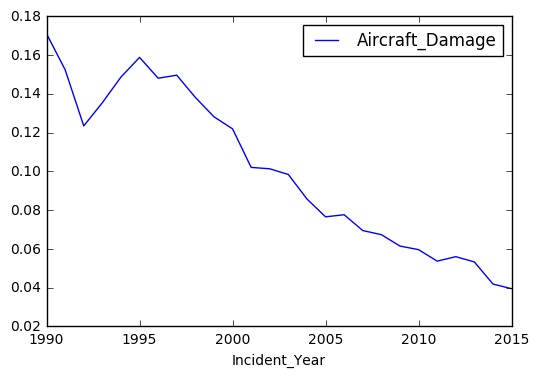

In [12]:
df_grouped = df.groupby(by='Incident_Year')
df_total = df_grouped.Aircraft_Damage.count()
print(df_total)
df_rate = pd.DataFrame(df_grouped.Aircraft_Damage.sum()/df_grouped.Aircraft_Damage.count())
df_rate.plot(kind='line')

##### Aircraft Damage Rate Over Time
The above plot shows that the rate of incidents causing damage has been and is continuing to drop at a steady pace. This can be related to better built aircraft or possibly strikes are by smaller birds and the bigger more damaging birds have been pushed away from airports.

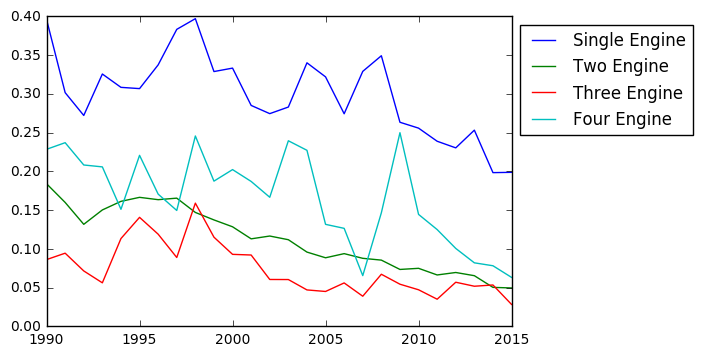

In [13]:
#Damage rate over time
df_group_year = df.groupby(by=['Incident_Year','Engines'], as_index=False)['Aircraft_Damage'].mean()

a1 = df_group_year.where(df_group_year['Engines']==1.0)
a2 = df_group_year.where(df_group_year['Engines']==2.0)
a3 = df_group_year.where(df_group_year['Engines']==3.0)
a4 = df_group_year.where(df_group_year['Engines']==4.0)
a1 = a1.dropna()
a2 = a2.dropna()
a3 = a3.dropna()
a4 = a4.dropna()

plt.plot(a1['Incident_Year'],a1['Aircraft_Damage'],label='Single Engine')
plt.plot(a2['Incident_Year'],a2['Aircraft_Damage'],label='Two Engine')
plt.plot(a3['Incident_Year'],a3['Aircraft_Damage'],label='Three Engine')
plt.plot(a4['Incident_Year'],a4['Aircraft_Damage'],label='Four Engine')
plt.legend(loc="upper left", bbox_to_anchor=(1,1))



##### Aircraft Damage Count Over Time by Number of Engines on Aircraft
The above plot shows that the count of incidents causing damage has been and is continuing to drop at a steady pace. This splits it out into 4 categories based on number of engines on the aircraft. It can be seen that larger aircraft (those with 3 & 4 engines) have a higher decrease over time in incidents causing damage; than smaller craft (those with 1 & 2 engines).

In [14]:
df_grouped = df.groupby(by=['Engines'])
print (df_grouped.Aircraft_Damage.count())
print (df_grouped.Aircraft_Damage.sum())
print (df_grouped.Aircraft_Damage.sum() / df_grouped.Aircraft_Damage.count())

Engines
1.0      6863
2.0    106122
3.0      8526
4.0      3070
Name: Aircraft_Damage, dtype: int64
Engines
1.0     1951
2.0    10153
3.0      642
4.0      495
Name: Aircraft_Damage, dtype: int64
Engines
1.0    0.284278
2.0    0.095673
3.0    0.075299
4.0    0.161238
Name: Aircraft_Damage, dtype: float64


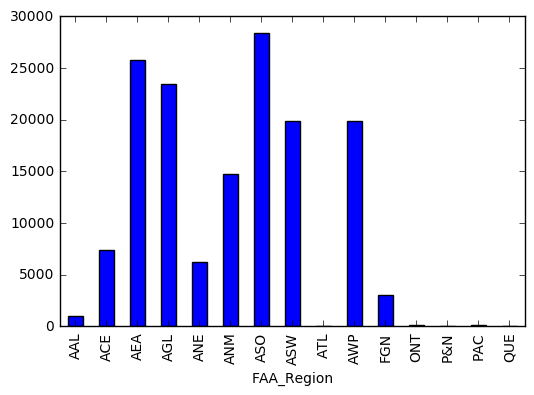

In [15]:
df_region = df.groupby(by='FAA_Region')
df_region_count = df_region.Aircraft_Damage.count()

ax = df_region_count.plot(kind='bar')

###### Strikes Causing Damage from FAA Regions
This plot shows that the ASO FAA region has the highest count of damaging strikes in the period of 1990-2015.

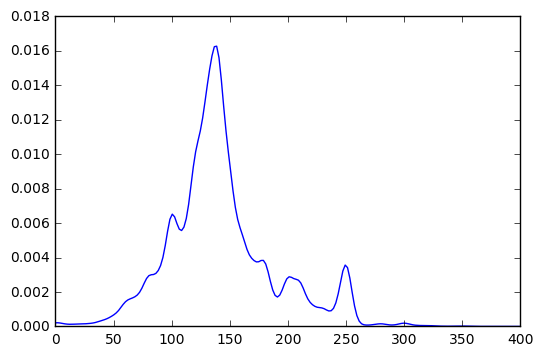

In [16]:
from scipy.stats import gaussian_kde
df_speed = df['Speed']
df_speed = df_speed.dropna()
density = gaussian_kde(df_speed)
xs = np.linspace(0,400,200)
#density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs))
plt.show()

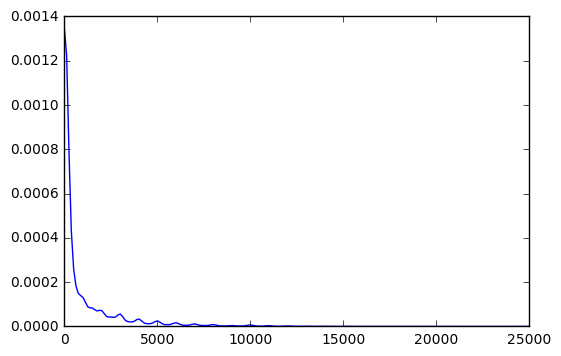

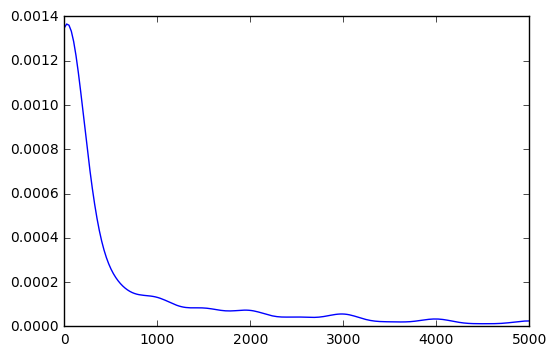

In [17]:
df_height = df['Height']
df_height = df_height.dropna()
density = gaussian_kde(df_height)
xs = np.linspace(0,25000,200)
#density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs))
plt.show()

xs = np.linspace(0,5000,200)
#density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs))
plt.show()

###### Height
The plot above shows that the vast maority of bird strikes on aircraft occur at lower heights which makes sence since large planes fly well above the flight height of birds.

Aircraft_Damage     False     True 
Flight_Phase                       
APPROACH         0.904655  0.095345
ARRIVAL          0.954248  0.045752
CLIMB            0.838927  0.161073
DEPARTURE        0.964088  0.035912
DESCENT          0.798104  0.201896
EN ROUTE         0.612827  0.387173
LANDING          0.952998  0.047002
LANDING ROLL     0.956609  0.043391
LOCAL            0.951299  0.048701
PARKED           0.946237  0.053763
TAKEOFF RUN      0.917227  0.082773
TAXI             0.944928  0.055072


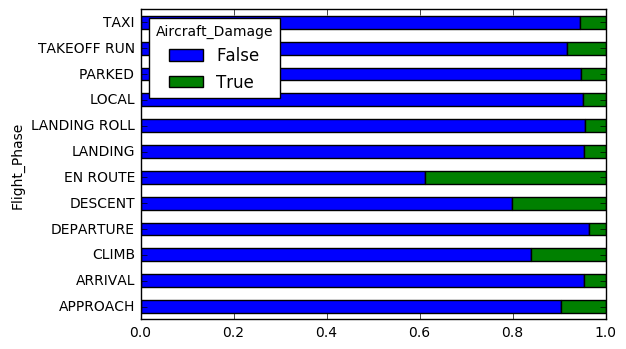

In [18]:
df_phase = pd.crosstab(df['Flight_Phase'],df.Aircraft_Damage.astype(bool))
df_phase_rate = df_phase.div(df_phase.sum(1).astype(float),
                            axis=0)
print(df_phase_rate)
ax = df_phase_rate.plot(kind='barh',stacked=True)

###### Flight Phase vs. Rate of Damage
This plot shows the flight phase where the highest incident of a bird strike causing damage is the EN ROUTE which is also the phase that lasts the longest time so there is more chace of a strike occuring.

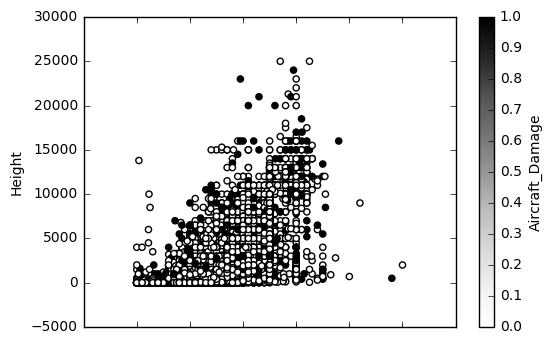

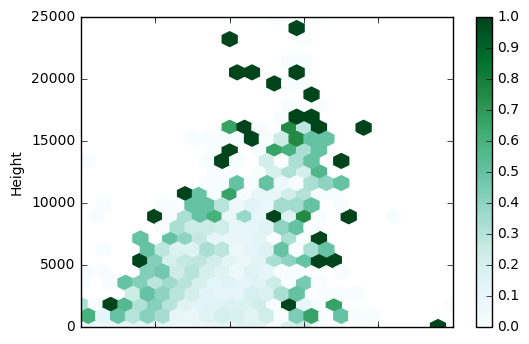

In [19]:
df_speed_height = df[['Speed','Height','Aircraft_Damage']]
df_speed_height = df_speed_height.dropna()
#df_speed_height = df_speed_height[df_speed_height['Speed'] < 2000]
#used to drop a bad data point.  The speed indicated in the data was faster than the plan was capable of flying.
#plt.plot(df_speed_height['Speed'],df_speed_height['Height'],"o")
ax = df_speed_height.plot(kind='scatter', x='Speed',y='Height',c='Aircraft_Damage')
df_speed_height.plot(kind='hexbin', x='Speed',y='Height',C='Aircraft_Damage',reduce_C_function=np.mean,gridsize=25)

###### Height / Speed / Damage
These 2 plots map height and speed against all strikes and if damage was incured or not. The first one uses just black dots indicating damage occured and white dots indicating no damage. The Hex plot takes those results and averages them out to shaded hexes. These hexes show that the highest rate of damage occuring from a strik appear to occurs outside of where a regression line could be drawn for "Typical Height and Speed". Conditions where more damage strikes occur appear to happen at higher flight with below average speed for that height or higher speed at lower height than the average speed for that height (High and slow or fast and low). 

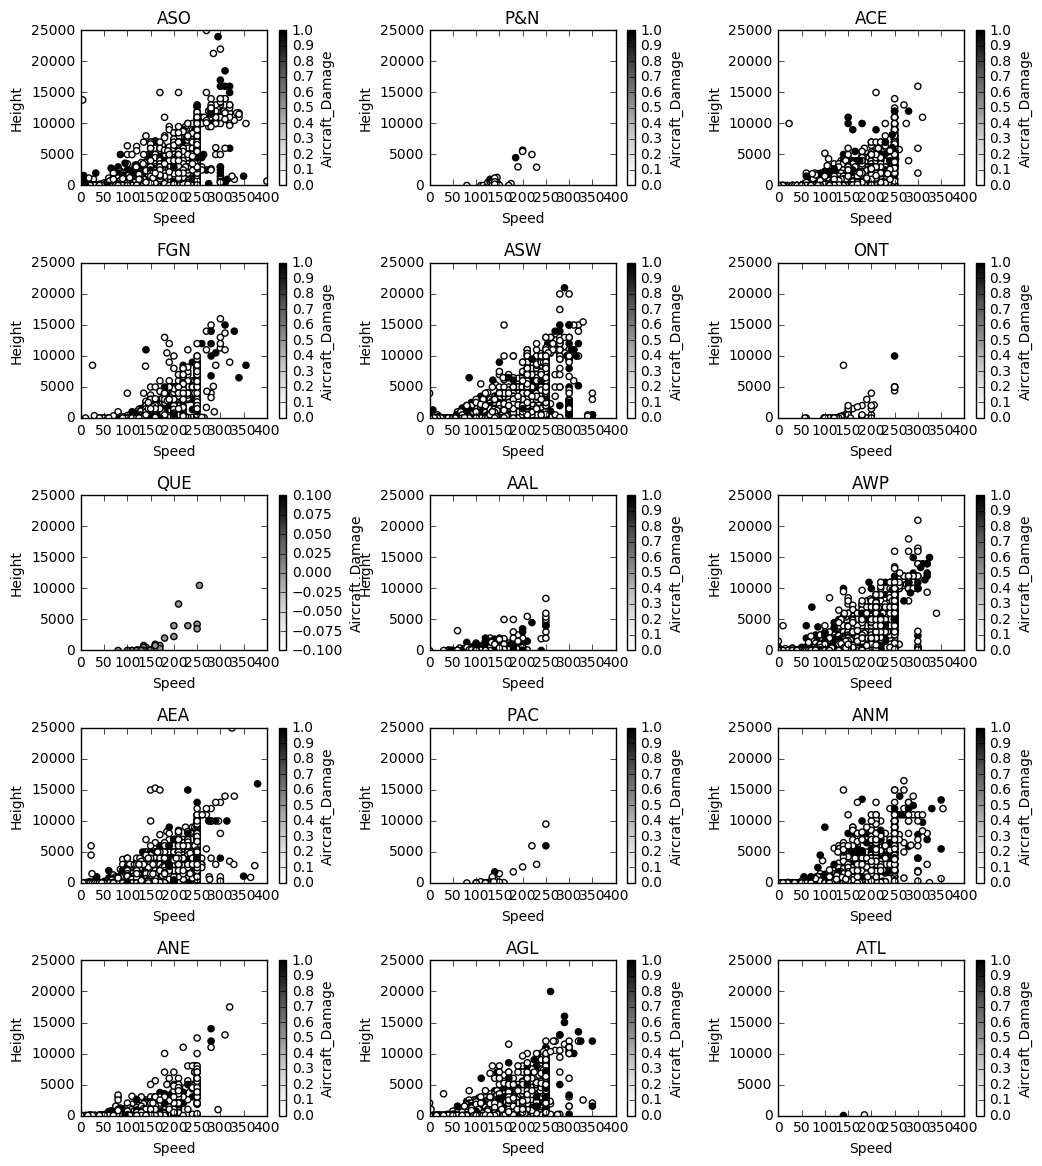

In [20]:
df_speed_height_region = df[['Speed','Height','FAA_Region','Aircraft_Damage']]
df_speed_height_region = df_speed_height_region.dropna()
df_speed_height_region = df_speed_height_region[df_speed_height_region['Speed'] < 2000]
FAA_Region = pd.unique(df_speed_height_region['FAA_Region'])

plt.subplots_adjust(wspace=0.5, hspace=0.5)

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(12,14))
plt.subplots_adjust(wspace=0.5, hspace=0.5)
for index, plot_vars in enumerate(FAA_Region):
    a = index % 3
    b = index % 5
    figregion = df_speed_height_region[df_speed_height_region['FAA_Region'] == FAA_Region[index]]
    ax = figregion.plot(ax=axes[b,a],kind='scatter', x='Speed',y ='Height',c='Aircraft_Damage',xlim=(0,400),ylim=(0,25000), title=FAA_Region[index])
plt.show()
    

###### Height / Speed / Damage by FAA Region
This plot matrix shows the various FAA regions and the same plots as above. This shows the incidents at each FAA region and shows similar results but is harder to find as much relevence. It can still bee seen that outlier strikes that are outside the average height and speed more often result in damage from a strike.

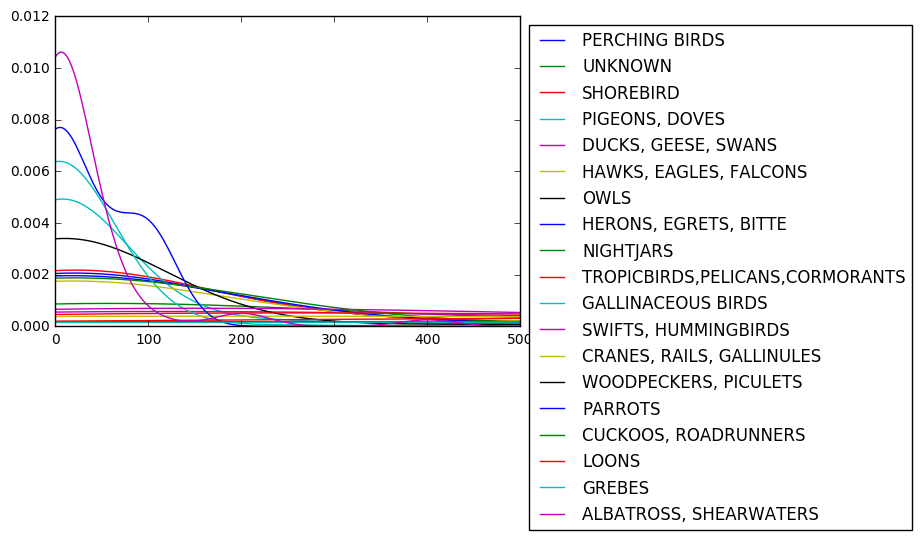

In [21]:
df_birdgroup_height = df[['species_group','Height','Aircraft_Damage']]
df_birdgroup_height = df_birdgroup_height.dropna()
df_birdgroup_height = df_birdgroup_height[df_birdgroup_height['species_group'] != 'KINGFISHER']
#df_birdgroup_height = df_birdgroup_height[df_birdgroup_height['species_group'] != 'PARROTS']
#df_birdgroup_height = df_birdgroup_height[df_birdgroup_height['species_group'] != 'LOONS']
#df_birdgroup_height = df_birdgroup_height[df_birdgroup_height['species_group'] != 'CUCKOOS, ROADRUNNERS']
#df_birdgroup_height = df_birdgroup_height[df_birdgroup_height['species_group'] != 'GREBES']
birdcounts = pd.DataFrame(df_birdgroup_height.groupby(by='species_group').count())
#birdcounts = birdcounts[birdcounts['Height']<50]
species_group = pd.unique(df_birdgroup_height['species_group'])

a=0
b=0
#fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(12,14))
#plt.subplots_adjust(wspace=0.5, hspace=0.5)
for index, plot_vars in enumerate(species_group):
    a = index % 3
    b = index % 5
    figbird = df_birdgroup_height[df_birdgroup_height['species_group'] == species_group[index]]
    figbird_height = figbird['Height']
    density = gaussian_kde(figbird_height)
    xs = np.linspace(0,500,200)
    density._compute_covariance()
    plt.plot(xs,density(xs),label=species_group[index])
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    

##### Density plot of bird strike heights
This density plot shows how bird strikes are distributed by species group.  The plot is only from the range of 0 to 500 ft as most of the strikes occured at that height and the right tail of the chart goes to 0 as the height increases for all species.

## Additional work that could have been done
The visability column did not did not have a lot of data.  We could have used LDA to help fill in some of the gaps with visability.  Visability would be an important factor in avoiding bird strikes